|Challenge Set 2|
|---------------|
|Topic: |Explore 2013 movie data|
|Date: |07/18/2017|
|Name: |Jessica Cox|
|Worked with: |Kevin|

In [84]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [52]:
movies_df = pd.read_csv('/Users/Jessica/ds/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [56]:
#sort by date
movies_df = movies_df.sort_values('ReleaseDate')

In [57]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,nan,34341945,John Luessenhop,R,92,2013-01-04 00:00:00
76,A Haunted House,2500000.000,40041683,Michael Tiddes,R,80,2013-01-11 00:00:00
70,Gangster Squad,60000000.000,46000903,Ruben Fleischer,R,113,2013-01-11 00:00:00
46,Mama,15000000.000,71628180,Andres Muschietti,PG-13,100,2013-01-18 00:00:00
63,Hansel and Gretel: Witch Hunters,50000000.000,55703475,Tommy Wirkola,R,88,2013-01-25 00:00:00


In [60]:
movies_df.ReleaseDate = pd.to_datetime(movies_df.ReleaseDate)
movies_df.ReleaseDate = movies_df.ReleaseDate.dt.date

# Challenge 1

In [64]:
date = list(movies_df['ReleaseDate'])
total_gross = list(movies_df['DomesticTotalGross'])

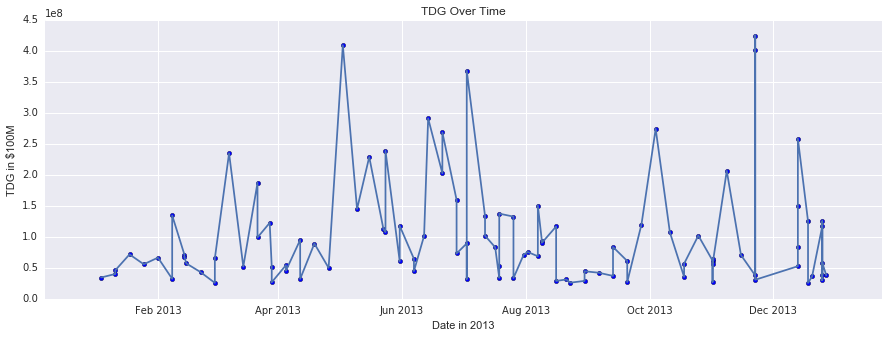

In [71]:
plt.figure(figsize=(15,5))
plt.scatter(date, total_gross)
plt.plot(date, total_gross)
plt.title('TDG Over Time')
plt.xlabel('Date in 2013')
plt.ylabel('TDG in $100M')
plt.show()

# Challenge 2

In [72]:
#sort by runtime
movies_df = movies_df.sort_values('Runtime')

In [73]:
runtime = list(movies_df['Runtime'])

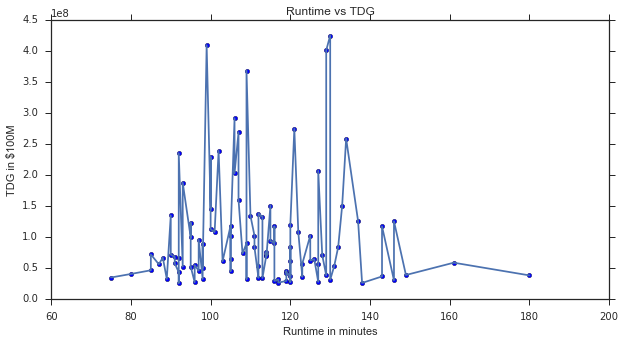

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(runtime, total_gross)
plt.plot(runtime, total_gross)
plt.title('Runtime vs TDG')
plt.xlabel('Runtime in minutes')
plt.ylabel('TDG in $100M')
plt.show()

# Challenge 3

In [80]:
movies_df.groupby('Rating').mean()

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,nan,268492764.000,107.000
PG,93933333.333,131135716.067,99.933
PG-13,96609756.098,111449769.021,117.511
R,38863636.364,69892429.000,110.730


# Challenge 4

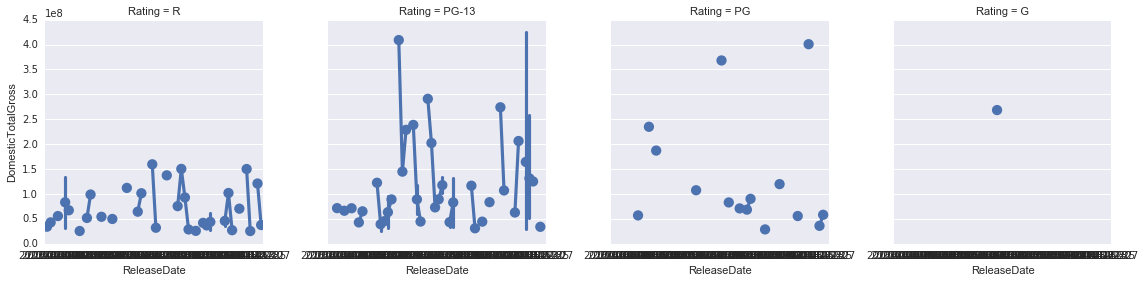

In [87]:
movies_df = movies_df.sort_values('ReleaseDate')
g = sns.factorplot(x="ReleaseDate", y="DomesticTotalGross", col="Rating", data=movies_df)

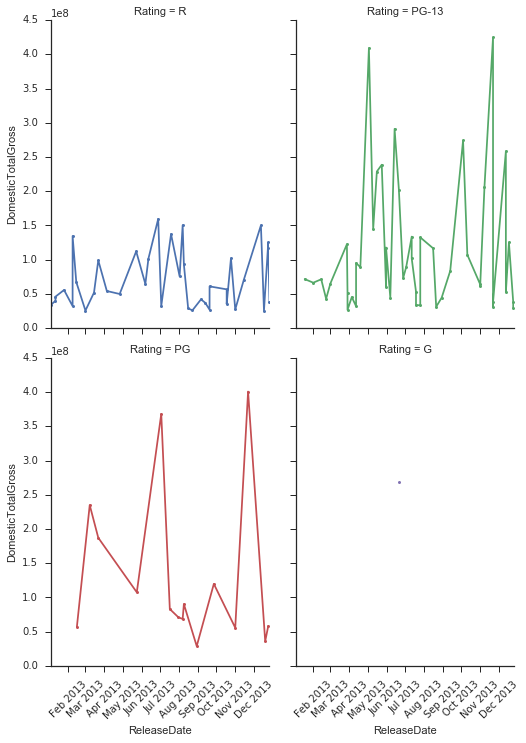

In [90]:
sns.set(style="ticks")

grid = sns.FacetGrid(movies_df, col='Rating', hue="Rating", size=5.0, col_wrap=2, 
                     aspect=0.75, sharey=True, despine=True)

grid.map(plt.plot, 'ReleaseDate', 'DomesticTotalGross', marker='o', 
         ms=3, ls='-')

for ax in grid.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

# challenge 5

In [91]:
movies_per_director = movies_df['Director'].value_counts()

In [92]:
movies_per_director

Malcolm D. Lee                2
Tyler Perry                   2
James Wan                     2
Barry CookNeil Nightingale    1
Jonathan Levine               1
Andrew Niccol                 1
Klay Hall                     1
Luc Besson                    1
Jeff Wadlow                   1
Jon Turteltaub                1
Joseph Kosinski               1
Brad Anderson                 1
Paul Greengrass               1
David Twohy                   1
Lee Daniels                   1
Bryan Singer                  1
Alan Taylor                   1
Gore Verbinski                1
Neill Blomkamp                1
J.J. Abrams                   1
Ben Stiller                   1
John Wells                    1
Michael Bay                   1
Dan Scanlon                   1
Lasse Hallstrom               1
Edgar Wright                  1
Steve McQueen (II)            1
Woody Allen                   1
Pierre CoffinChris Renaud     1
Peter Segal                   1
                             ..
Roland E

In [100]:
movies_by_director.max()

Budget               225000000.000
DomesticTotalGross   424668047.000
Runtime                    180.000
dtype: float64

In [162]:
(movies_df.groupby('Director').mean()['DomesticTotalGross']).max()

424668047.0

# Challenge 6

In [115]:
movies_df['ReleaseDate'] = pd.to_datetime(movies_df['ReleaseDate'])
movies_df['year'], movies_df['month'] = movies_df['ReleaseDate'].apply(lambda x: x.year), movies_df['ReleaseDate'].apply(lambda x: x.month)


In [116]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,year,month
83,Texas Chainsaw 3D,nan,34341945,John Luessenhop,R,92,2013-01-04,2013,1
76,A Haunted House,2500000.000,40041683,Michael Tiddes,R,80,2013-01-11,2013,1
70,Gangster Squad,60000000.000,46000903,Ruben Fleischer,R,113,2013-01-11,2013,1
46,Mama,15000000.000,71628180,Andres Muschietti,PG-13,100,2013-01-18,2013,1
63,Hansel and Gretel: Witch Hunters,50000000.000,55703475,Tommy Wirkola,R,88,2013-01-25,2013,1


In [166]:
dtg_month = list(movies_df.groupby('month').mean()['DomesticTotalGross'])

In [167]:
dtg_month

[49543237.200000003,
 67386013.714285716,
 96097096.222222224,
 60940719.5,
 177409720.5,
 150650005.75,
 105780721.91666667,
 68531263.090909094,
 61712314.333333336,
 115027038.2,
 137936759.90000001,
 87483385.692307696]

In [168]:
dtg_month_error = list(movies_df.groupby('month').sem()['DomesticTotalGross'])

In [169]:
dtg_month_error

[6555914.0346012339,
 12409272.366782786,
 24413138.904748078,
 10329105.790811909,
 39518588.373287313,
 33658260.210311189,
 26387322.106470302,
 12459149.013074297,
 14216539.945168318,
 42012719.253830932,
 48572933.069897763,
 18537593.864519801]

In [151]:
month_list = list(range(1,13))
month_label = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

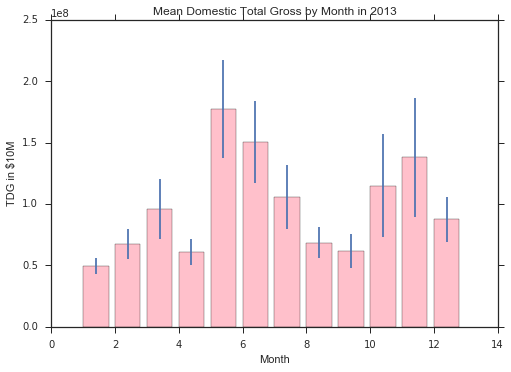

In [172]:
fig, ax = plt.subplots()
plt.bar(month_list, dtg_month, width = 0.8, yerr = dtg_month_error, color='pink')
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.xlabel('Month')
plt.ylabel('TDG in $10M')
plt.show()